# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Simulating-Data" data-toc-modified-id="Simulating-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Simulating Data</a></div><div class="lev1 toc-item"><a href="#STAN-model-for-$\mu$-inferred-from-$Y^{max}$" data-toc-modified-id="STAN-model-for-$\mu$-inferred-from-$Y^{max}$-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>STAN model for <span class="MathJax_Preview">\mu</span><script type="math/tex">\mu</script> inferred from <span class="MathJax_Preview">Y^{max}</span><script type="math/tex">Y^{max}</script></a></div><div class="lev1 toc-item"><a href="#STAN-model-for-$\mu$-inferred-from-$Y^{max}$-and-$Y^{min}$" data-toc-modified-id="STAN-model-for-$\mu$-inferred-from-$Y^{max}$-and-$Y^{min}$-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>STAN model for <span class="MathJax_Preview">\mu</span><script type="math/tex">\mu</script> inferred from <span class="MathJax_Preview">Y^{max}</span><script type="math/tex">Y^{max}</script> and <span class="MathJax_Preview">Y^{min}</span><script type="math/tex">Y^{min}</script></a></div><div class="lev1 toc-item"><a href="#Smooth-Max" data-toc-modified-id="Smooth-Max-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Smooth Max</a></div><div class="lev1 toc-item"><a href="#Inferring-$\sigma$" data-toc-modified-id="Inferring-$\sigma$-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Inferring <span class="MathJax_Preview">\sigma</span><script type="math/tex">\sigma</script></a></div><div class="lev1 toc-item"><a href="#Identifiability" data-toc-modified-id="Identifiability-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Identifiability</a></div><div class="lev1 toc-item"><a href="#Alternative-smooth-max" data-toc-modified-id="Alternative-smooth-max-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Alternative smooth max</a></div>

$$
    \newcommand{\genericdel}[3]{%
      \left#1#3\right#2
    }
    \newcommand{\del}[1]{\genericdel(){#1}}
    \newcommand{\sbr}[1]{\genericdel[]{#1}}
    \newcommand{\cbr}[1]{\genericdel\{\}{#1}}
    \newcommand{\abs}[1]{\genericdel||{#1}}
    \DeclareMathOperator*{\argmin}{arg\,min}
    \DeclareMathOperator*{\argmax}{arg\,max}
    \DeclareMathOperator{\Pr}{\mathbb{p}}
    \DeclareMathOperator{\E}{\mathbb{E}}
    \DeclareMathOperator{\Ind}{\mathbb{I}}
    \DeclareMathOperator{\var}{var}
    \DeclareMathOperator{\cov}{cov}
    \newcommand{\bnaive}{\widehat{\beta}}
    \newcommand{\bbayes}{\widetilde{\beta}}
    \newcommand{\bboot}{\beta^{*}}
    \newcommand{\bdouble}{\beta^{**}}
    \newcommand{\bbootnv}{\hat{\beta}^*}
    \newcommand{\bbootby}{\widetilde{\beta}^*}
    \newcommand{\bcorrect}{\beta^{\checkmark}}
    \newcommand{\bbayescorrect}{\widetilde{\beta}^{\checkmark}}
    \newcommand{\ybar}{\bar{Y}}
    \newcommand{\ypred}{\widetilde{y}}
    \newcommand{\ybarpred}{\widetilde{\bar{Y}}}
    \DeclareMathOperator{\invchi}{\mathrm{Inv-\chi}^2}
    \newcommand{\thresh}{\ybar{}_0}
    \newcommand{\muo}{\mu_{0}}
    \newcommand{\sigo}{\sigma_{0}}
    \newcommand{\hmt}{\bar{Y_t}}
    \newcommand{\hst}{s_t^2}
    \newcommand{\hmc}{\bar{Y_c}}
    \newcommand{\hsc}{s_c^2}
    \newcommand{\mt}{\mu_t}
    \newcommand{\sigt}{\sigma_t}
    \newcommand{\vt}{\sigma_t^2}
    \newcommand{\mc}{\mu_c}
    \newcommand{\vc}{\sigma_c^2}
    \newcommand{\sigc}{\sigma_c}
    \DeclareMathOperator*{\argmin}{arg\,min}
    \DeclareMathOperator*{\argmax}{arg\,max}
    \newcommand{\effect}{\mathrm{eff}}
    \newcommand{\xtilde}{\widetilde{X}}
    \DeclareMathOperator{\normal}{\mathcal{N}}
    \DeclareMathOperator{\unif}{Uniform}
    \newcommand{\below}{\unicode{x25E7}}
    \newcommand{\above}{\unicode{x25E8}}
    \newcommand{\discont}{\unicode{x25EB}}
    \newcommand{\jbelow}{\unicode{x21E5}}
    \newcommand{\jabove}{\unicode{x21E4}}
$$

Our goal in this project will be to impute hourly temperatures from the daily minima and maxima. Before embarking on this task, I wanted to check that it's possible to impute data from just the minimum and maximum, in a much simpler setting, using the Bayesian inference package [Stan](http://mc-stan.org).

# Simulating Data

This is the simplest example I could think of. For each observation $i$, there are $p$ underlying (latent) data $X_{i,j}$, which are drawn independently from a normal distribution with mean $\mu$. What we observe is $Y^{max}_i$ and $Y^{min}_i$, the maximum and minimum of the $X_{i,:}$

\begin{align}    
    X_{i,j} &\sim \normal\del{\mu, \sigma} & i=1,\ldots,N & ~;~ j=1,\ldots,p \\ 
    Y^{max}_i &= \max_j(X_{i,j})\\
    Y^{min}_i &= \min_j(X_{i,j})\\
    \mu &= 10 \\
    \sigma &= 1 \\
\end{align}    

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# module import
import pystan
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 6.0)

''

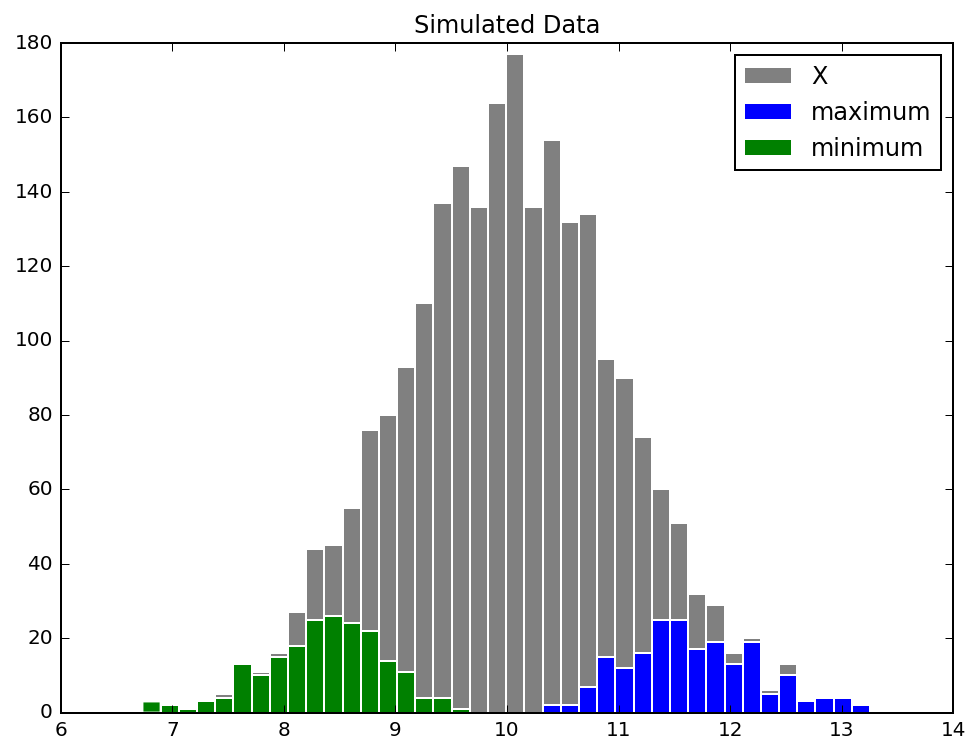

In [2]:
mu=10.0
N=200
p=12
X=np.random.randn(N,p)+mu
Ymax=np.max(X, axis=1)
Ymin=np.min(X, axis=1)
_,xbins,_ = plt.hist(X.flatten(), bins=40, color="grey", label="X", edgecolor="white")
plt.hist(Ymax, bins=xbins, label="maximum", edgecolor="white")
plt.hist(Ymin, bins=xbins, label="minimum", edgecolor="white")
plt.legend()
plt.title("Simulated Data")
;

# STAN model for $\mu$ inferred from $Y^{max}$

We'll build this up step by step. First let's try to infer $\mu$ using the maximum data $Y^{max}$ alone, and let's make the standard deviation $\sigma$ known (1.0 in this case). So, as far as Stan is concerned, this is the model:

\begin{align}    
    X_{i,j} &\sim \normal\del{\mu, 1.0} & i=1,\ldots,N & ~;~ j=1,\ldots,p \\ 
    Y^{max}_i &= \max_j(X_{i,j})\\
    \mu &\sim 1 \text{ (flat prior)}\\
\end{align}    

In [3]:
model_code = """
    data {
     int<lower=0> N; // number of observations
     int<lower=0> p; // number of latent per obs
     real Ymax[N]; // response variable
    }
    parameters {
     real x[N,p]; // latent variables
     real mu; // global mean
    }
    model {
     for (i in 1:N){
         x[i] ~ normal(mu, 1.0);
     }    
     for (i in 1:N){
         Ymax[i] ~ normal(max(x[i]), 0.001); // = max(x[i]) didn't work
     }
    }
"""

# make a dictionary containing all data to be passed to STAN
data = {
 'p': p,
 'Ymax': Ymax,
 'Ymin': Ymin,
 'N': N}

fit = pystan.stan(model_code=model_code, data=data,
 iter=1000, chains=4)

In [4]:
# model summary
print(fit)

Inference for Stan model: anon_model_a87db89ba03d45fa78fac2aaba174d4a.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
x[0,0]      9.66    0.25   0.84   8.12    9.0   9.68  10.35  11.07     11   1.26
x[1,0]      9.78    0.14   0.83    8.0   9.28   9.85   10.4   11.2     37   1.05
x[2,0]     10.12    0.12   0.87   8.42   9.51  10.18  10.74  11.65     57   1.07
x[3,0]     10.59    0.79   1.12   8.55   9.42  11.56  11.57  11.57      2   2.45
x[4,0]     10.09     0.3   0.85   8.49   9.52  10.06  10.67  11.77      8   1.29
x[5,0]     10.13     0.2    1.0   8.23   9.45   10.1  10.87   12.0     26   1.14
x[6,0]      9.72    0.25   0.86   8.21   9.09   9.69  10.33  11.43     12   1.22
x[7,0]     11.48    1.17   1.66   8.52   9.96  12.59  13.02  13.02      2   2.94
x[8,0]     10.21    0.18   0.89    8.5   9.57  10.21  10.89  11.84     24   1.19
x[9

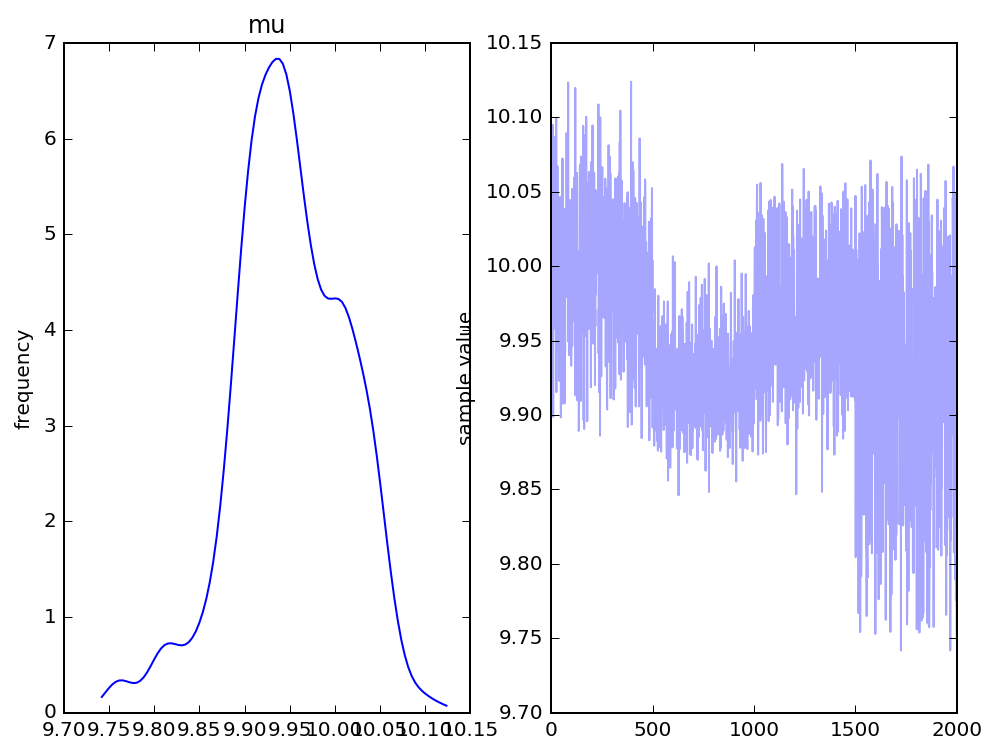

In [5]:
fit.plot(['mu']);

This is encouraging! The posterior on $\mu$ is towards the true $\mu=10$. We can see from the imputed $X$ values that the imputations respect the maximum dictated by the data, but not the minimum. This is obvious since the minimum $Y^{min}$ wasn't provided in the input, or included in the model.

''

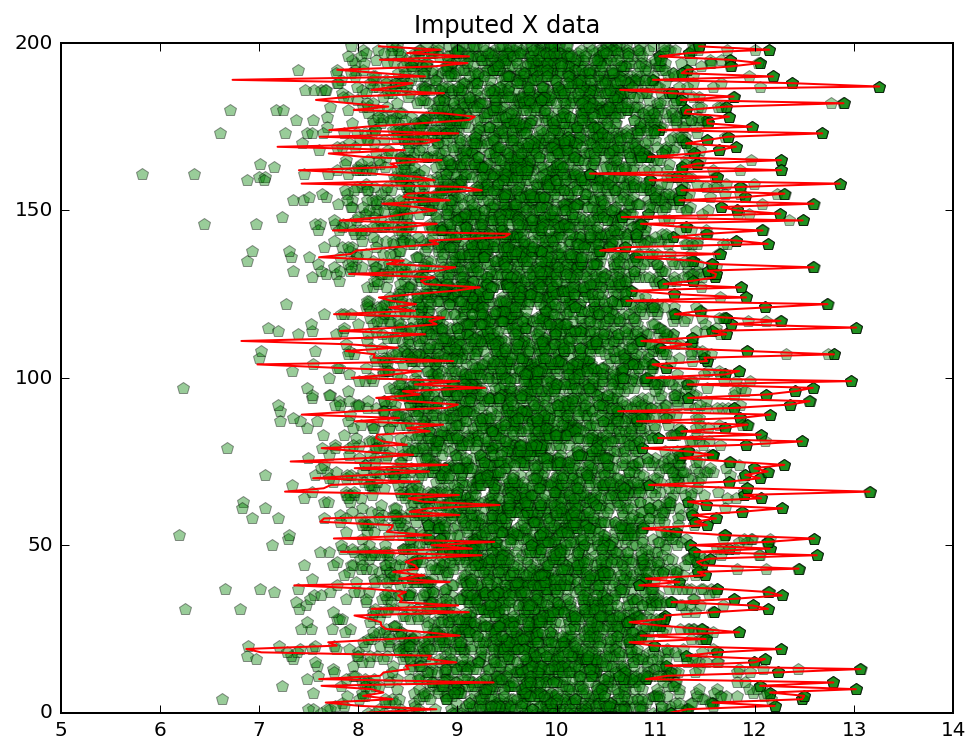

In [6]:
x_imputed = fit.extract('x')['x']
x_imputed.shape

ii = range(N)
for d in range(p):
#     plt.plot(X[:,d], ii, "o", color="grey", alpha=0.5)
    for t in range(-5,-1):
        plt.plot(x_imputed[t,:,d], ii, "p", color="green", alpha=0.4)
plt.plot(Ymin, ii, color="red")
plt.plot(Ymax, ii, color="red")
plt.title("Imputed X data")
;

# STAN model for $\mu$ inferred from $Y^{max}$ and $Y^{min}$

Now we'll add in the minimum, and see what happens. From a mathematical and a code standpoint, this is a very straightforward extension.

\begin{align}    
    X_{i,j} &\sim \normal\del{\mu, 1.0} & i=1,\ldots,N & ~;~ j=1,\ldots,p \\ 
    Y^{max}_i &= \max_j(X_{i,j})\\
    Y^{min}_i &= \min(X_{i,j})\\
    \mu &\sim 1 \\
\end{align}    

In [7]:
model_code_2 = """
    data {
     int<lower=0> N; // number of observations
     int<lower=0> p; // number of latent per obs
     real Ymax[N];
     real Ymin[N];
    }
    parameters {
     real x[N,p]; // latent variables
     real mu; // global mean
    }
    model {
     for (i in 1:N){
         x[i] ~ normal(mu, 1.0);
     }    
     for (i in 1:N){
         Ymax[i] ~ normal(max(x[i]), 0.01);
         Ymin[i] ~ normal(min(x[i]), 0.01);
     }
    }
"""

fit2 = pystan.stan(model_code=model_code_2, data=data,
 iter=1000, chains=4)

In [8]:
# model summary
print(fit2)

Inference for Stan model: anon_model_5dca1c48a594779c787611f1e976e394.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
x[0,0]      -0.3    0.53   0.75  -1.22  -1.04  -0.32   0.44   0.66      2    nan
x[1,0]      0.61    0.77   1.09  -0.26  -0.17   0.12   1.32   2.61      2   26.1
x[2,0]     -0.35    0.69   0.98  -1.85  -1.28  -0.13   0.53   0.69      2  714.8
x[3,0]     -0.39    0.78    1.1   -1.8  -1.28  -0.54   0.53   1.29      2  544.0
x[4,0]     -0.36     0.4   0.57  -1.21  -0.86   -0.3   0.14   0.38      2 228.66
x[5,0]      0.18    1.25   1.76  -1.64  -1.07  -0.35   1.18   3.67      2  16.89
x[6,0]      0.43    0.74   1.04  -0.81  -0.62   0.53   1.46   1.48      2    nan
x[7,0]     -0.27    0.52   0.74  -1.23  -0.93  -0.34   0.39   0.81      2    nan
x[8,0]     -1.31    0.22   0.31  -1.75   -1.6  -1.29  -1.02   -0.9      2    nan
x[9

''

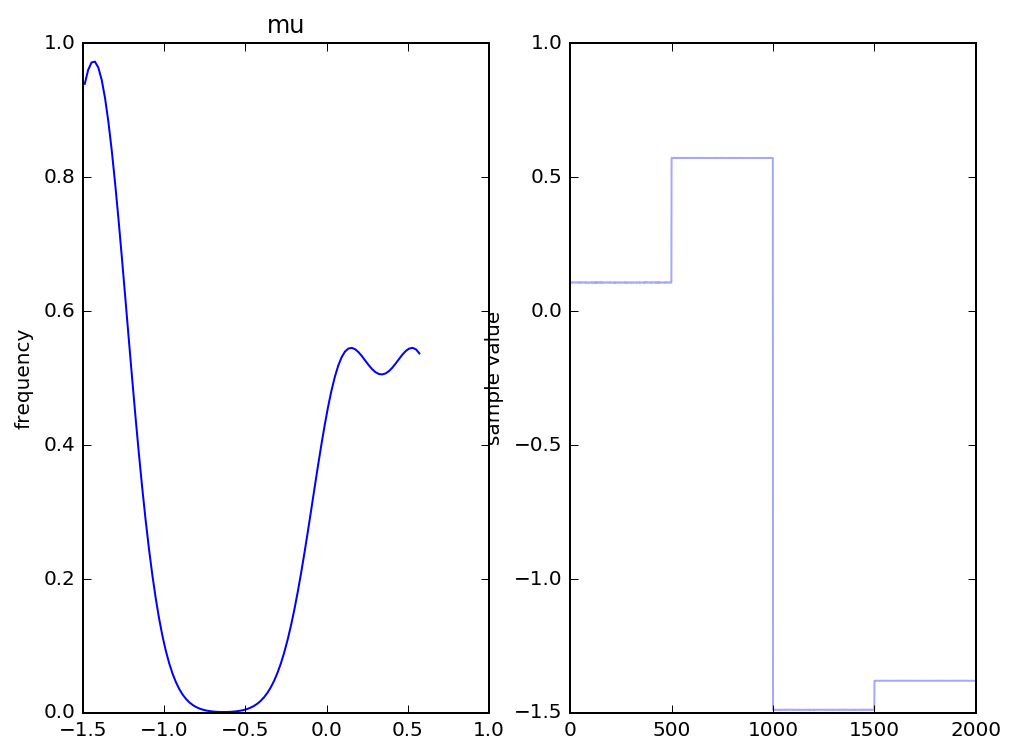

In [9]:
fit2.plot(['mu'])
;

That didn't work at all! The posterior on $\mu$ makes no sense, and Stan convergence diagnostics indicate that something went very wrong. We can also see that the imputed $X$ values make no sense, and don't respect the constraint imposed by $Y^{min}$.

''

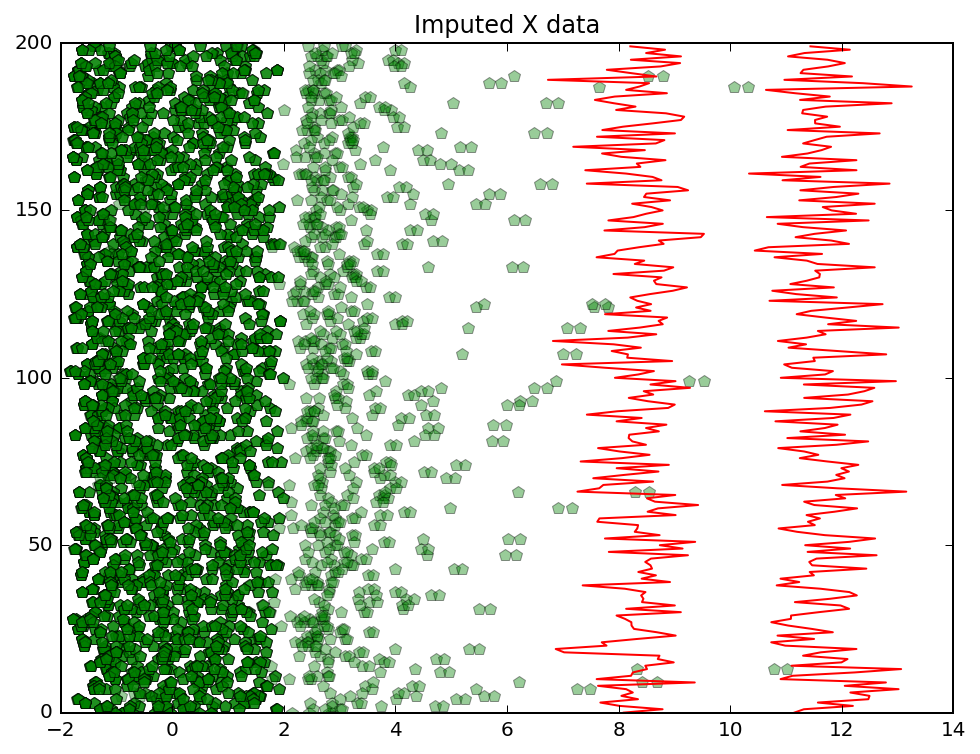

In [10]:
x_imputed = fit2.extract('x')['x']
x_imputed.shape

ii = range(N)
for d in range(p):
#     plt.plot(X[:,d], ii, "o", color="grey", alpha=0.5)
    for t in range(-5,-1):
        plt.plot(x_imputed[t,:,d], ii, "p", color="green", alpha=0.4)
plt.plot(Ymin, ii, color="red")
plt.plot(Ymax, ii, color="red")
plt.title("Imputed X data")
;

# Smooth Max

Part of what makes this difficult for Stan is that the maximum and minimum functions aren't differentiable. To alleviate this problem, we can substitute smooth approximations to the min and max functions. I'll use the approximation suggested by [John D. Cook](http://www.johndcook.com/blog/2010/01/13/soft-maximum/), although there are many alternatives. The $k$ parameter of these functions controls the smoothness of the function. A high $k$ value closely approximates the maximum, but a lower $k$ value will be smoother and might lead to better mixing.

In [11]:
def softmax(k, x):
    maxkx = np.max(k*x)
    return (maxkx+np.log(np.sum(np.exp(k*x-maxkx))))/k
    
softmax(20.0, X[1,:]),Ymax[1]

(11.403949500215006, 11.319210849100585)

In [12]:
def softmin(k, x):
    -softmax(k, -x)
    
-softmax(20.0, -X[1,:]),Ymin[1]

(8.7370599732698828, 8.7873777860658393)

In [13]:
softmin(20.0, X[1,:]),Ymin[1]

(8.7370599732698828, 8.7873777860658393)

In [14]:
model_code_3 = """
    data {
     int<lower=0> N; // number of observations
     int<lower=0> p; // number of latent per obs
     real Ymax[N];
     real Ymin[N];
    }
    parameters {
     real x[N,p]; // latent variables
     real mu; // global mean
    }
    transformed parameters {
        real Ysoftmax[N];
        real Ysoftmin[N];
        for (i in 1:N){
            real max10x;
            real min10x;
            max10x <- max(10.0*to_vector(x[i]));
            Ysoftmax[i] <-  (max10x+log(sum(exp( 10.0*to_vector(x[i]) - max10x))))/10.0;
            min10x <- min(-10.0*to_vector(x[i]));
            Ysoftmin[i] <- -(min10x+log(sum(exp(-10.0*to_vector(x[i]) - min10x))))/10.0;
        }
    }
    model {
     for (i in 1:N){
         x[i] ~ normal(mu, 1.0);
     }    
     for (i in 1:N){
         Ymax[i] ~ normal(Ysoftmax[i], 0.01);
         Ymin[i] ~ normal(Ysoftmin[i], 0.01);
     }
    }
"""

In [15]:
fit3 = pystan.stan(model_code=model_code_3, data=data,
 iter=1000, chains=4)

''

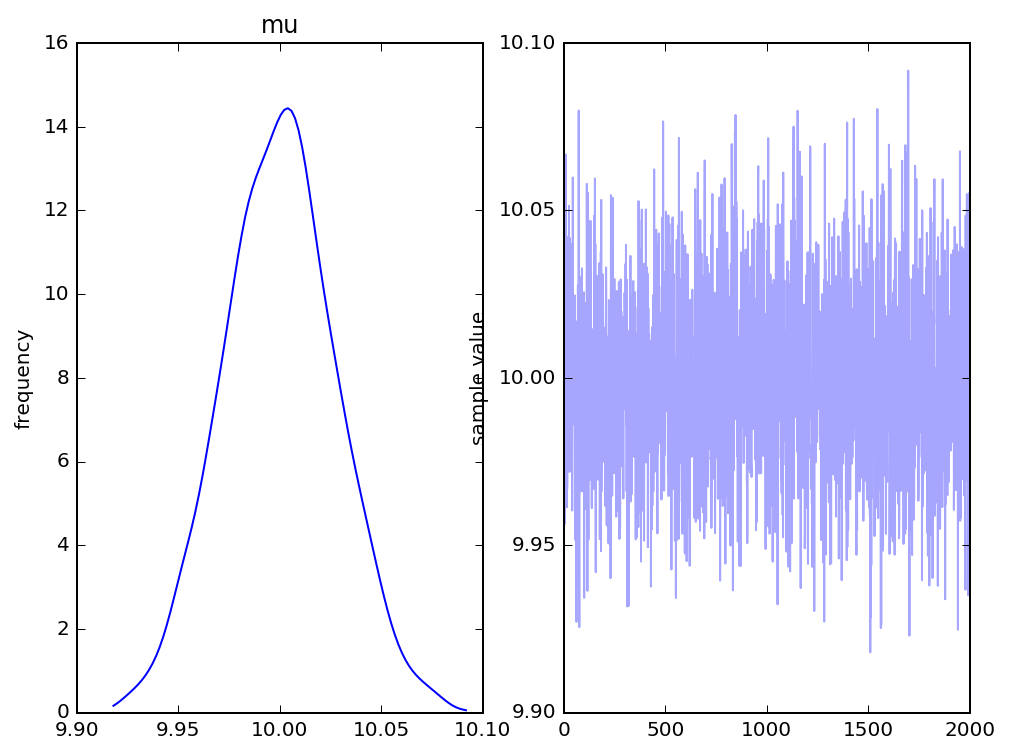

In [16]:
fit3.plot(['mu'])
;

This works really nicely, except it takes 23 minutes to fit this model, which seems much too high. The imputed $X$ values make perfect sense:

''

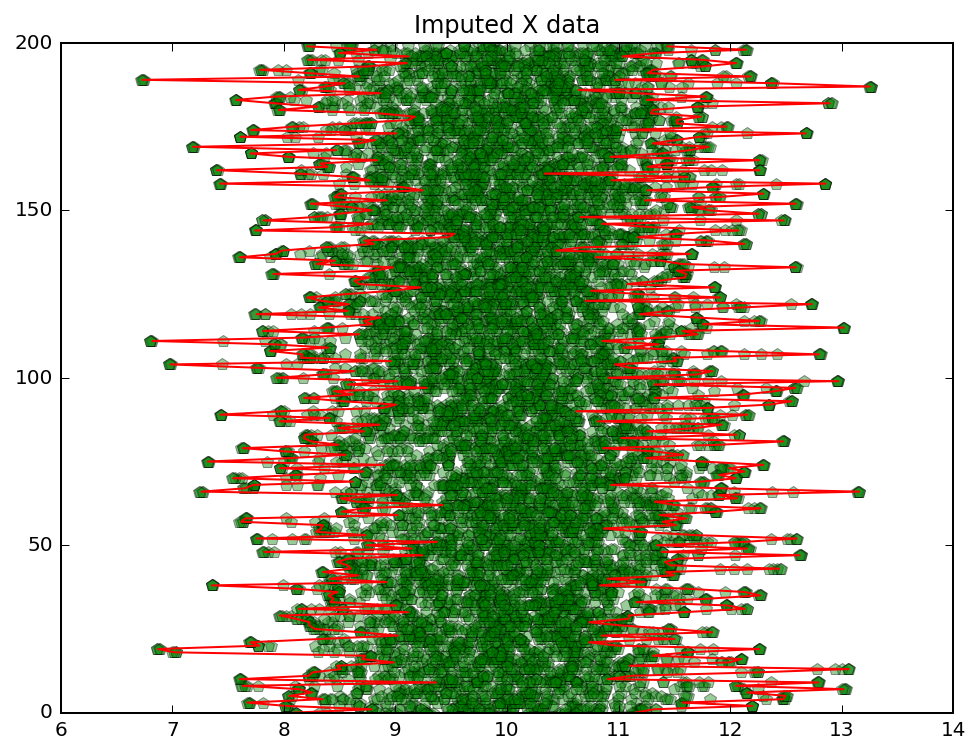

In [17]:
x_imputed = fit3.extract('x')['x']
x_imputed.shape

ii = range(N)
for d in range(p):
#     plt.plot(X[:,d], ii, "o", color="grey", alpha=0.5)
    for t in range(-5,-1):
        plt.plot(x_imputed[t,:,d], ii, "p", color="green", alpha=0.4)
plt.plot(Ymin, ii, color="red")
plt.plot(Ymax, ii, color="red")
plt.title("Imputed X data")
;

# Inferring $\sigma$

Let's take this one step further, and also infer $\sigma$. The model is now:

\begin{align}    
    X_{i,j} &\sim \normal\del{\mu, \sigma} & i=1,\ldots,N & ~;~ j=1,\ldots,p \\ 
    Y^{max}_i &= \max_j(X_{i,j})\\
    Y^{min}_i &= \min(X_{i,j})\\
    \mu &\sim 1 \\
    \sigma &\sim \invchi\del{\nu, s} \text{ scaled inverse chi squared distribution} \\
    \nu &= 1 \\
    s &= 1 \text{ scale parameter}\\
\end{align}    

In [18]:
model_code_4 = """
    data {
     int<lower=0> N; // number of observations
     int<lower=0> p; // number of latent per obs
     real Ymax[N];
     real Ymin[N];
    }
    parameters {
     real x[N,p]; // latent variables
     real mu; // global mean
     real sigma; // standard deviation
    }
    transformed parameters {
        real Ysoftmax[N];
        real Ysoftmin[N];
        for (i in 1:N){
            real max10x;
            real min10x;
            max10x <- max(10.0*to_vector(x[i]));
            Ysoftmax[i] <-  (max10x+log(sum(exp( 10.0*to_vector(x[i]) - max10x))))/10.0;
            min10x <- min(-10.0*to_vector(x[i]));
            Ysoftmin[i] <- -(min10x+log(sum(exp(-10.0*to_vector(x[i]) - min10x))))/10.0;
        }
    }
    model {
     sigma ~ scaled_inv_chi_square(1.0, 1.0);
     for (i in 1:N){
         x[i] ~ normal(mu, sigma);
     }    
     for (i in 1:N){
         Ymax[i] ~ normal(Ysoftmax[i], 0.01);
         Ymin[i] ~ normal(Ysoftmin[i], 0.01);
     }
    }
"""

In [19]:
fit4 = pystan.stan(model_code=model_code_4, data=data,
 iter=1000, chains=4)

In [20]:
print(fit4)

Inference for Stan model: anon_model_7b08ea65a1b6b8b275eda8bbb014e89a.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

                mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
x[0,0]          9.77    0.04   0.93   8.09    9.1   9.87  10.56  11.14    572    1.0
x[1,0]         10.02    0.03   0.77   8.79   9.38  10.01  10.64  11.31    668    1.0
x[2,0]         10.01    0.05   1.15   8.02   9.24   10.0  10.75   12.2    544    1.0
x[3,0]          9.87    0.05   1.08   7.67   9.21   9.94  10.69  11.57    529    1.0
x[4,0]         10.14    0.05   1.16   8.35   9.28  10.03  10.88  12.48    479    1.0
x[5,0]         10.14    0.06   1.27   8.04    9.2  10.07  10.97   12.5    405    1.0
x[6,0]         10.11    0.05   1.14   8.25   9.26  10.07   10.9  12.16    578    1.0
x[7,0]         10.21    0.12   1.38   8.13   9.24  10.08  10.98  13.02    134   1.02
x[8,0]          9.95    0.06   1.24   7.62   9.1

''

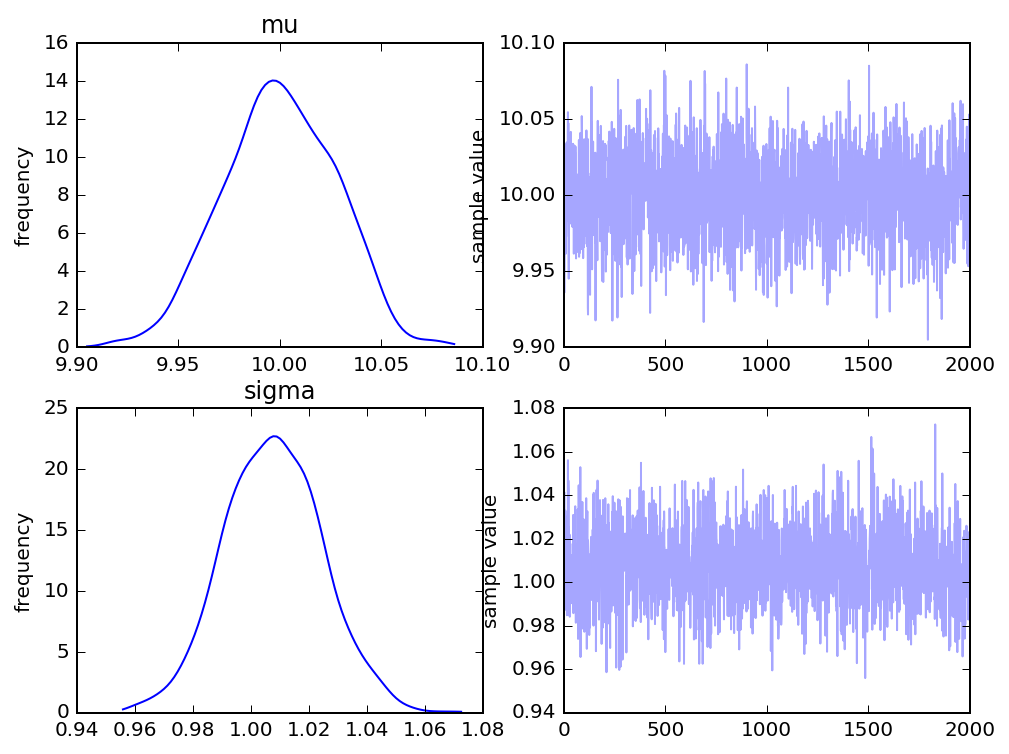

In [21]:
fit4.plot(['mu', 'sigma'])
;

(2000, 200, 12)


''

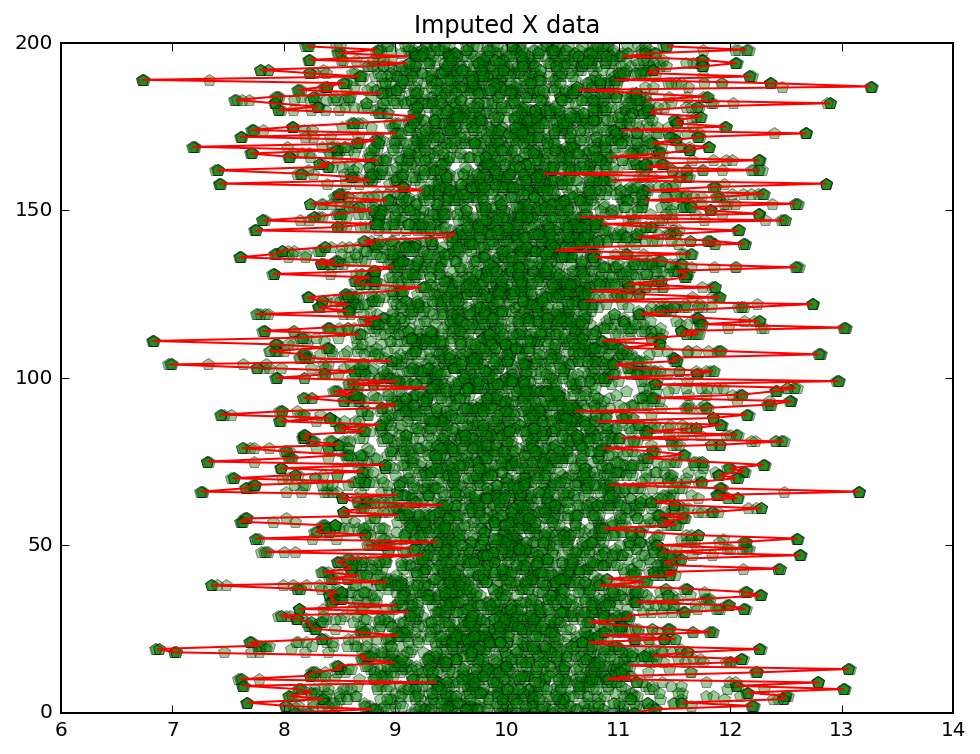

In [22]:
x_imputed = fit4.extract('x')['x']
print(x_imputed.shape)

ii = range(N)
for d in range(p):
#     plt.plot(X[:,d], ii, "o", color="grey", alpha=0.5)
    for t in range(-5,-1):
        plt.plot(x_imputed[t,:,d], ii, "p", color="green", alpha=0.4)
plt.plot(Ymin, ii, color="red")
plt.plot(Ymax, ii, color="red")
plt.title("Imputed X data")
;

Inference on $\mu$ and $\sigma$ works beautifully. The imputed $X$ data respect the constraints imposed by $Y^{min}$ and $Y^{max}$. 

# Identifiability

I was worried that one of the latent states would get stuck “being” the maximum, and another the minimum. This would hurt us in our case if the MCMC algorithm gets stuck in a local maximum. But it turns out Stan does a decent job at this, and each $X_{i,j}$ seems to get its turn being the maximum and the minimum. It's not perfect, but certainly not disastrous either. The plots below are for the first 4 observations.

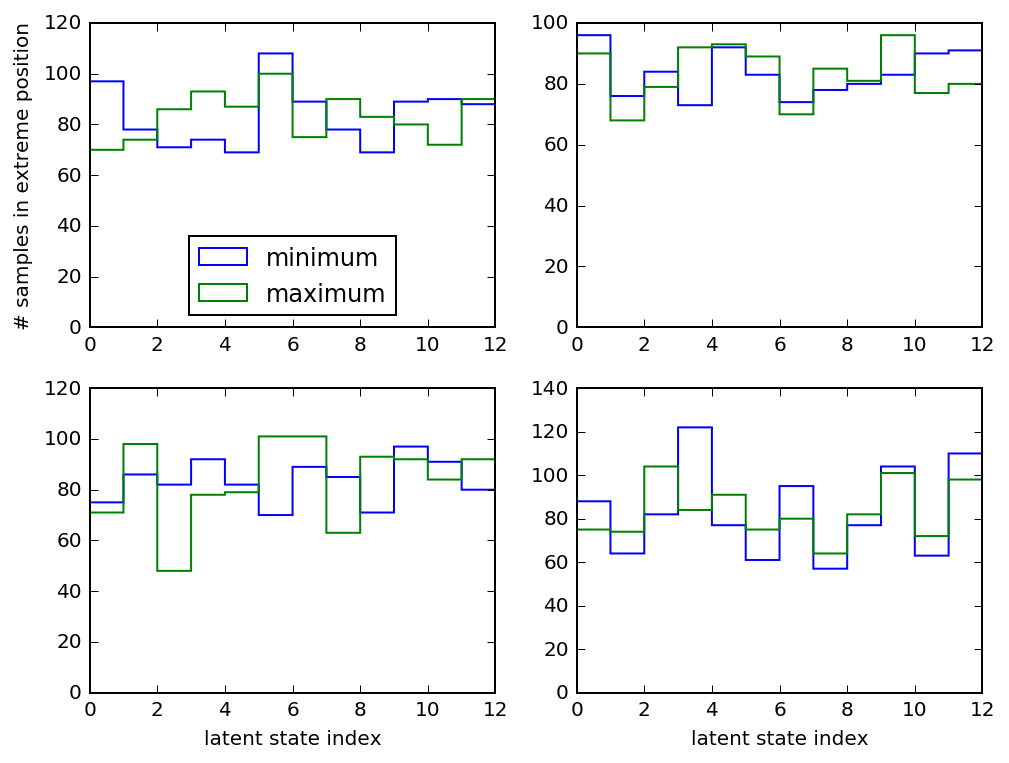

In [23]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.hist(np.argmin(x_imputed[1000:,i,:], axis=1), bins=range(13), histtype="step", label="minimum");
    plt.hist(np.argmax(x_imputed[1000:,i,:], axis=1), bins=range(13), histtype="step", label="maximum");
    if i==0:
        plt.ylabel("# samples in extreme position")
        plt.legend(loc="lower center")
    if i in (2,3):
        plt.xlabel("latent state index")

# Alternative smooth max

One problem with John Cook's softmax which I used above is that $smoothmax(x,x;k)=\log(\exp(kx)+\exp(kx)) = \log 2 + x$ instead of $x$. This is a very undesirable feature, as it means imputations with ties will be given the wrong maximum, irrespective of the sharpness $k$. Wikipedia has a smoothmax specification which seems like it would be better behaved:
$$\mathrm{smoothmax}(x_i,\ldots,x_p ; k) = \frac{ \sum_{i=1}^p x_i e^{kx_i}}{ \sum_{i=1}^p  e^{kx_i}}$$

In [35]:
def smoothmax(k, x):
    meankx = np.mean(k*x)
    weights = np.exp(k*x-meankx)
    return np.sum(x * weights) / np.sum(weights)
    
softmax(20.0, X[1,:]),Ymax[1],smoothmax(20.0, X[1,:])

(11.403949500215006, 11.319210849100585, 11.304289561868178)

In [36]:
def smoothmin(k, x):
    return -smoothmax(k, -x)
    
-softmax(20.0, -X[1,:]),Ymin[1], smoothmin(20.0, X[1,:]),

(8.7370599732698828, 8.7873777860658393, 8.788975415563824)

In [37]:
model_code_5 = """
    functions {
        real smoothmax(vector x, real k){
            return sum(x .* exp(k*x)) / sum(exp(k*x));
        }
        real smoothmin(vector x, real k){
            return -smoothmax(-x, k);
        }
    }
    data {
     int<lower=0> N; // number of observations
     int<lower=0> p; // number of latent per obs
     real Ymax[N];
     real Ymin[N];
    }
    parameters {
     real x[N,p]; // latent variables
     real mu; // global mean
     real sigma; // standard deviation
    }
    transformed parameters {
        real Ysoftmax[N];
        real Ysoftmin[N];
        for (i in 1:N){
            Ysoftmax[i] <- smoothmax(to_vector(x[i]), 10.0);
            Ysoftmin[i] <- smoothmin(to_vector(x[i]), 10.0);
        }
    }
    model {
     sigma ~ scaled_inv_chi_square(1.0, 1.0);
     for (i in 1:N){
         x[i] ~ normal(mu, sigma);
     }    
     for (i in 1:N){
         Ymax[i] ~ normal(Ysoftmax[i], 0.01);
         Ymin[i] ~ normal(Ysoftmin[i], 0.01);
     }
    }
"""

In [38]:
fit5 = pystan.stan(model_code=model_code_5, data=data,
 iter=1000, chains=4)

In [39]:
fit5

Inference for Stan model: anon_model_d4bb44f991ba74241ca8f7a518693e3c.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

                mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
x[0,0]          9.79    0.04   0.96   8.07   9.11   9.86   10.6  11.18    587    1.0
x[1,0]         10.02    0.03    0.8   8.76   9.41  10.02  10.64  11.35    632    1.0
x[2,0]         10.04    0.05    1.2    8.0   9.18  10.02  10.86  12.21    542    1.0
x[3,0]          9.85    0.06   1.14   7.66   9.18   9.94  10.69  11.59    350   1.01
x[4,0]         10.11    0.06   1.14   8.33   9.28  10.03  10.86  12.48    400   1.01
x[5,0]          9.93    0.05   1.13   8.03   9.15   9.94  10.65  12.47    428    1.0
x[6,0]         10.06    0.05   1.11   8.23   9.24  10.02  10.81  12.16    478   1.01
x[7,0]          10.0    0.06   1.15   8.12   9.21   9.98  10.71   13.0    332   1.01
x[8,0]           9.9    0.08   1.31   7.62   8.9

(2000, 200, 12)


''

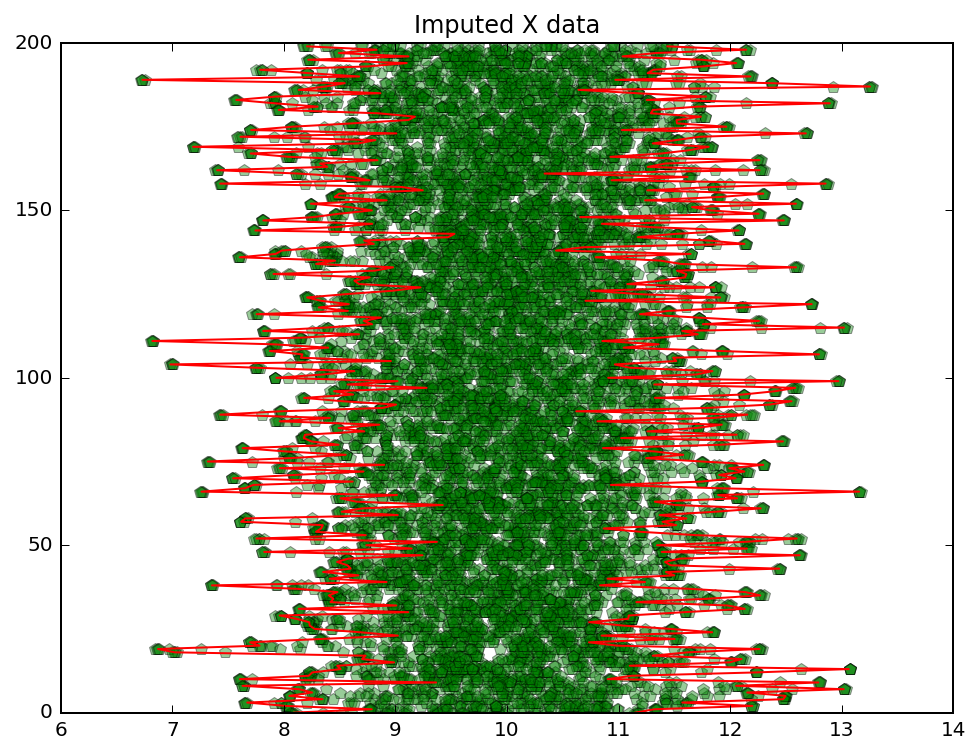

In [40]:
x_imputed = fit5.extract('x')['x']
print(x_imputed.shape)

ii = range(N)
for d in range(p):
#     plt.plot(X[:,d], ii, "o", color="grey", alpha=0.5)
    for t in range(-5,-1):
        plt.plot(x_imputed[t,:,d], ii, "p", color="green", alpha=0.4)
plt.plot(Ymin, ii, color="red")
plt.plot(Ymax, ii, color="red")
plt.title("Imputed X data")
;

''

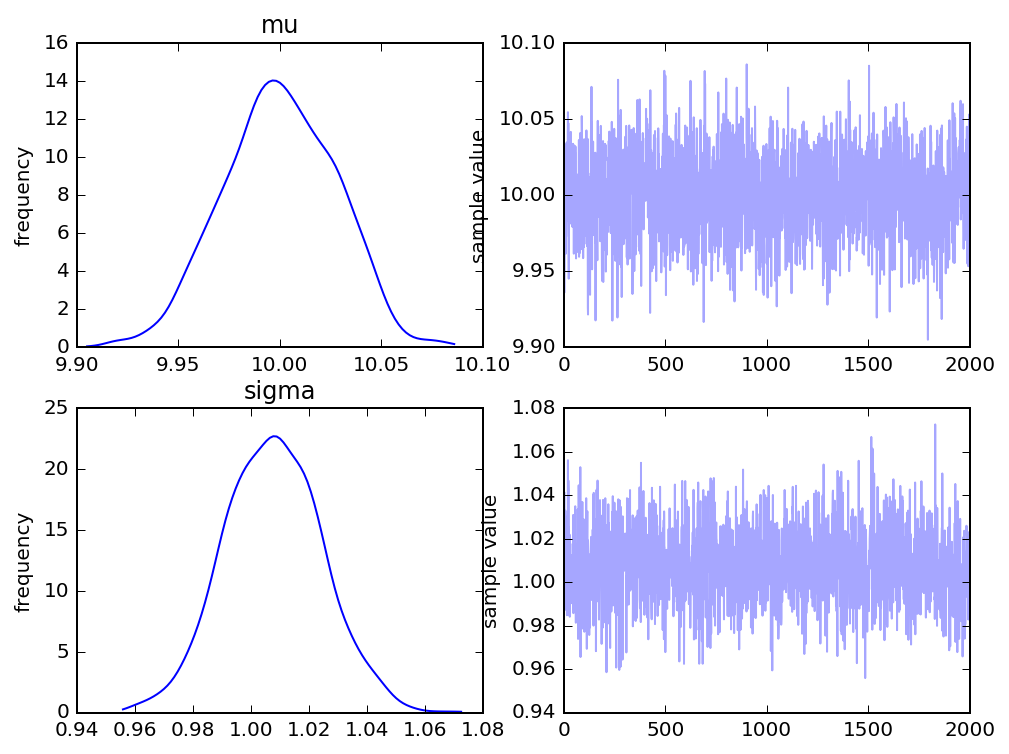

In [41]:
fit4.plot(['mu', 'sigma'])
;

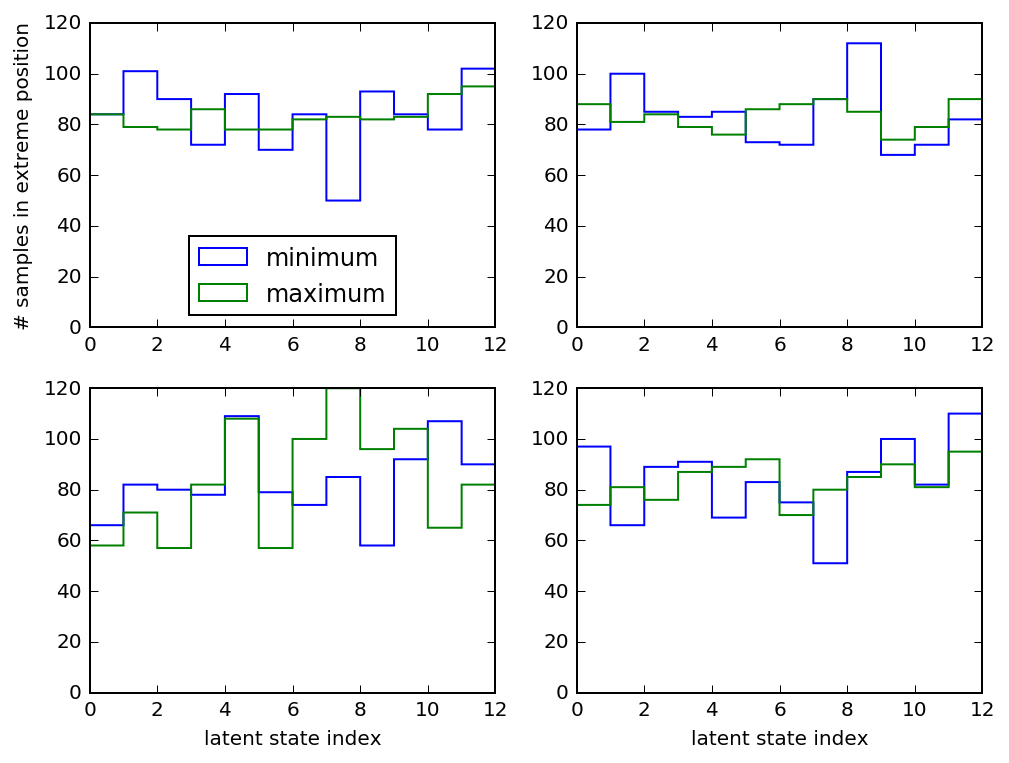

In [42]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.hist(np.argmin(x_imputed[1000:,i,:], axis=1), bins=range(13), histtype="step", label="minimum");
    plt.hist(np.argmax(x_imputed[1000:,i,:], axis=1), bins=range(13), histtype="step", label="maximum");
    if i==0:
        plt.ylabel("# samples in extreme position")
        plt.legend(loc="lower center")
    if i in (2,3):
        plt.xlabel("latent state index")